In [7]:
import pandas as pd
from squat_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average squat and heaviest squat by weight class and sex
# Then calcualte the relative strength and absolute & relative strength percent growth figures
sex_age_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_squat_lbs=("squat_lbs", "mean"), 
            heaviest_squat=("squat_lbs", "mean"), 
            average_age=("age", "mean"), 
            oldest=("age", "max"), 
            youngest=("age", "min")
        )
        .round(2)
)

sex_age_comparisons

avg_bodyweight_lbs  avg_squat_lbs  heaviest_squat  \
weightclass_lbs    sex                                                      
148                F                146.91         449.12          449.12   
                   M                145.41         562.32          562.32   
165                F                161.79         470.84          470.84   
                   M                168.78         623.31          623.31   
181                F                177.53         475.34          475.34   
                   M                183.88         683.75          683.75   
198                F                194.26         483.48          483.48   
                   M                207.51         737.08          737.08   
220                F                213.04         476.43          476.43   
                   M                222.01         770.46          770.46   
242                M                238.06         794.16          794.16   
275                M                268.60         836.67          836.67   
308                M                298.58         849.40          849.40   
Super Heavy Weight F                289.51         572.27          572.27   
                   M                363.97         893.69          893.69   

                        average_age  oldest  youngest  
weightclass_lbs    sex                                 
148                F          28.07    45.0      20.5  
                   M          27.25    57.0      18.5  
165                F          31.12    62.0      20.0  
                   M          25.95    39.0      18.5  
181                F          29.42    43.0      20.0  
                   M          27.62    37.0      17.0  
198                F          31.66    56.0      21.0  
                   M          28.51    57.0      19.5  
220                F          30.94    54.0      18.5  
                   M          28.35    39.0      21.0  
242                M          29.40    47.0      21.0  
275                M          30.65    44.0      20.0  
308                M          29.82    46.0      19.0  
Super Heavy Weight F          27.66    45.0      15.0  
                   M          30.21    49.0      18.0

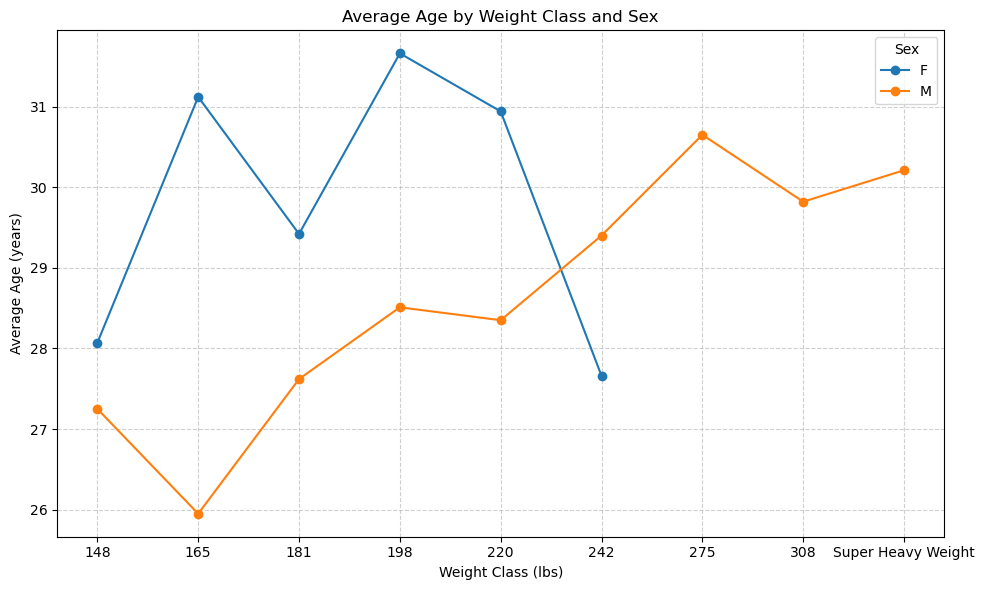

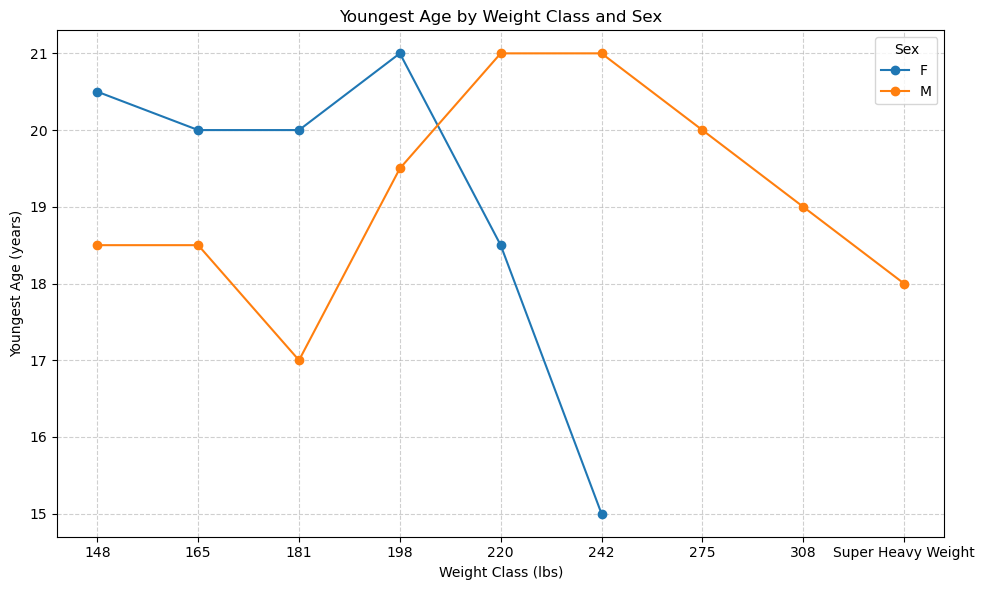

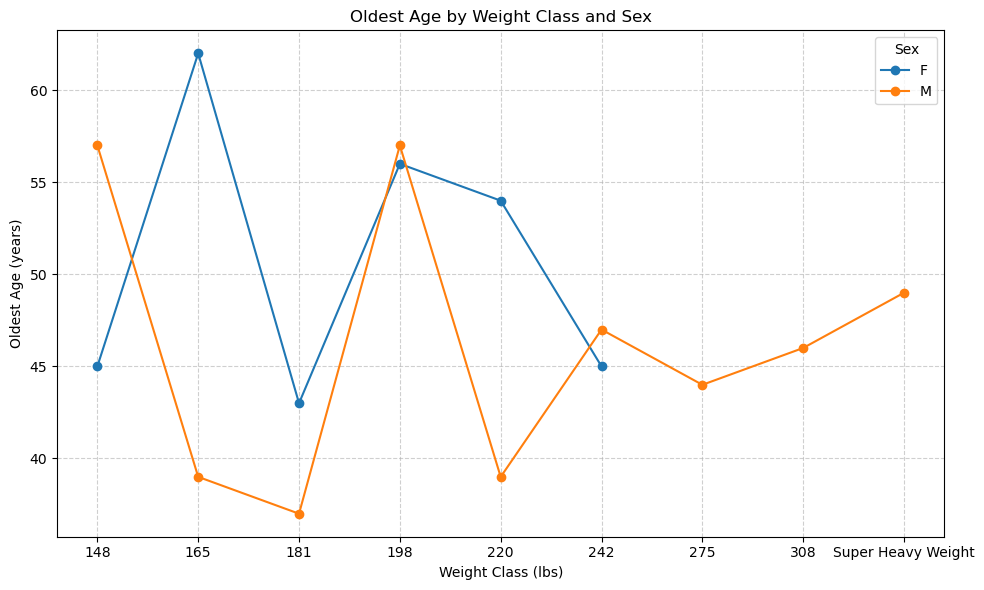

In [9]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_age_comparisons.reset_index()

# Helper: sort weight classes numerically with "Super Heavy Weight" last 
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort dataframe by weight class numeric order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))

# Build ordered x-axis labels
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Common plotting style
def plot_age_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Average Age
plot_age_metric(
    y_col="average_age",
    title="Average Age by Weight Class and Sex",
    ylabel="Average Age (years)"
)

# Youngest Age
plot_age_metric(
    y_col="youngest",
    title="Youngest Age by Weight Class and Sex",
    ylabel="Youngest Age (years)"
)

# Oldest Age
plot_age_metric(
    y_col="oldest",
    title="Oldest Age by Weight Class and Sex",
    ylabel="Oldest Age (years)"
)
